<a href="https://colab.research.google.com/github/ethaneubanks/housing_price_predictor/blob/main/AI_in_BE_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

In [31]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import pandas as pd

file_path = "/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv"
df = pd.read_excel(file_path)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Unnamed: 21,Unnamed: 22
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,NaN,188.050847
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,NaN,209.338521
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,NaN,233.766234
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,NaN,308.163265
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,NaN,303.571429


In [33]:
df["price_per_sqft"] = df["price"] / df["sqft_living"]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Unnamed: 21,Unnamed: 22,price_per_sqft
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,NaN,188.050847,188.050847
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,NaN,209.338521,209.338521
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,NaN,233.766234,233.766234
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,NaN,308.163265,308.163265
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,NaN,303.571429,303.571429


In [34]:
df[["price", "sqft_living", "price_per_sqft"]].head()

,price,sqft_living,price_per_sqft
0,221900,1180,188.050847
1,538000,2570,209.338521
2,180000,770,233.766234
3,604000,1960,308.163265
4,510000,1680,303.571429


In [35]:
# Columns to drop because they are irrelevant or duplicates
cols_to_drop = [
    "id", "date", "lat", "long",
    "sqft_living15", "sqft_lot15",
    "Unnamed: 21", "Unnamed: 22"
]

df = df.drop(columns=cols_to_drop, errors="ignore")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,188.050847
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,209.338521
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,233.766234
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,308.163265
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,303.571429


In [36]:
df["zipcode"] = df["zipcode"].astype(str)

In [37]:
df = df.dropna()

In [38]:
## outlier trim
low = df["price_per_sqft"].quantile(0.01)
high = df["price_per_sqft"].quantile(0.99)
df = df[(df["price_per_sqft"] >= low) & (df["price_per_sqft"] <= high)]

In [39]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,price_per_sqft
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,188.050847
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,209.338521
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,233.766234
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,308.163265
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,303.571429


In [40]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sqft
count,2.117900e+04,21179.000000,21179.000000,21179.000000,2.117900e+04,21179.000000,21179.000000,21179.000000,21179.000000,21179.000000,21179.000000,21179.000000,21179.000000,21179.000000,21179.000000
mean,5.322000e+05,3.370556,2.114807,2074.950234,1.512865e+04,1.497073,0.005572,0.223571,3.409698,7.658010,1785.998961,288.951272,1971.231645,83.588555,261.449899
std,3.281505e+05,0.924578,0.762104,903.952040,4.170406e+04,0.540844,0.074436,0.742208,0.649867,1.163188,819.460972,438.603586,29.351004,399.826269,100.771349
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,105.504587
25%,3.250000e+05,3.000000,1.750000,1430.000000,5.030000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,183.420499
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.592000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,244.644550
75%,6.400000e+05,4.000000,2.500000,2540.000000,1.062650e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,316.459555
max,5.570000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,632.142857


In [41]:
# Select features
features = [
    "sqft_living", "sqft_lot", "bedrooms", "bathrooms", "floors",
    "waterfront", "view", "condition", "grade",
    "sqft_above", "sqft_basement",
    "yr_built", "yr_renovated",
    "zipcode"   # categorical
]

target = "price_per_sqft"

X = df[features]
y = df[target]

# One-hot encode zipcode for modeling later
X = pd.get_dummies(X, columns=["zipcode"], drop_first=True)

X.head()

## This cell extracts the variables to analyze, treats zipcode as a catagory, and prepares "x" and "y" for modeling

,sqft_living,sqft_lot,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,5650,3,1.00,1.0,0,0,3,7,1180,...,False,False,False,False,False,False,True,False,False,False
1,2570,7242,3,2.25,2.0,0,0,3,7,2170,...,False,False,False,False,False,False,False,False,False,False
2,770,10000,2,1.00,1.0,0,0,3,6,770,...,False,False,False,False,False,False,False,False,False,False
3,1960,5000,4,3.00,1.0,0,0,5,7,1050,...,False,False,False,False,False,False,False,False,False,False
4,1680,8080,3,2.00,1.0,0,0,3,8,1680,...,False,False,False,False,False,False,False,False,False,False


Making the Train/Test (70/30) split

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train.shape, X_test.shape

((14825, 82), (6354, 82))

step 4 - Baseline models

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import math

results = {}

# ---------------------------
# Baseline A: Global Mean
# ---------------------------
global_mean = y_train.mean()
y_pred_mean = np.full_like(y_test, global_mean)

results["Global Mean"] = {
    "MAE": mean_absolute_error(y_test, y_pred_mean),
    "RMSE": math.sqrt(mean_squared_error(y_test, y_pred_mean))
}

# ---------------------------
# Baseline B: Median-by-Zipcode
# ---------------------------
# Compute TRAINING median per zipcode
train_zip_medians = df.loc[y_train.index].groupby("zipcode")["price_per_sqft"].median()

def predict_zip_median(zipcode):
    if zipcode in train_zip_medians:
        return train_zip_medians[zipcode]
    else:
        return global_mean  # fallback

# Extract test zipcodes using original df
test_zipcodes = df.loc[y_test.index, "zipcode"]
y_pred_zip = test_zipcodes.apply(predict_zip_median)

results["Median by Zip"] = {
    "MAE": mean_absolute_error(y_test, y_pred_zip),
    "RMSE": math.sqrt(mean_squared_error(y_test, y_pred_zip))
}

# ---------------------------
# Baseline C: Linear Regression
# ---------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

results["Linear Regression"] = {
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "RMSE": math.sqrt(mean_squared_error(y_test, y_pred_lr))
}

# Show results
pd.DataFrame(results).T

,MAE,RMSE
Global Mean,78.027506,99.258632
Median by Zip,46.663417,66.460508
Linear Regression,38.186271,53.431518


Train a Random Forest Regressor (Expressive Model)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = math.sqrt(mean_squared_error(y_test, y_pred_rf))

rf_mae, rf_rmse

(38.43000154199261, 56.313307740852025)

The Random Forest performs almost exactly the same as Linear Regression. This means that the relationship between the features and price_per_sqft is mostly linear, or the features don’t have deep non-linear interactions.

Step 6 - Feature Importance

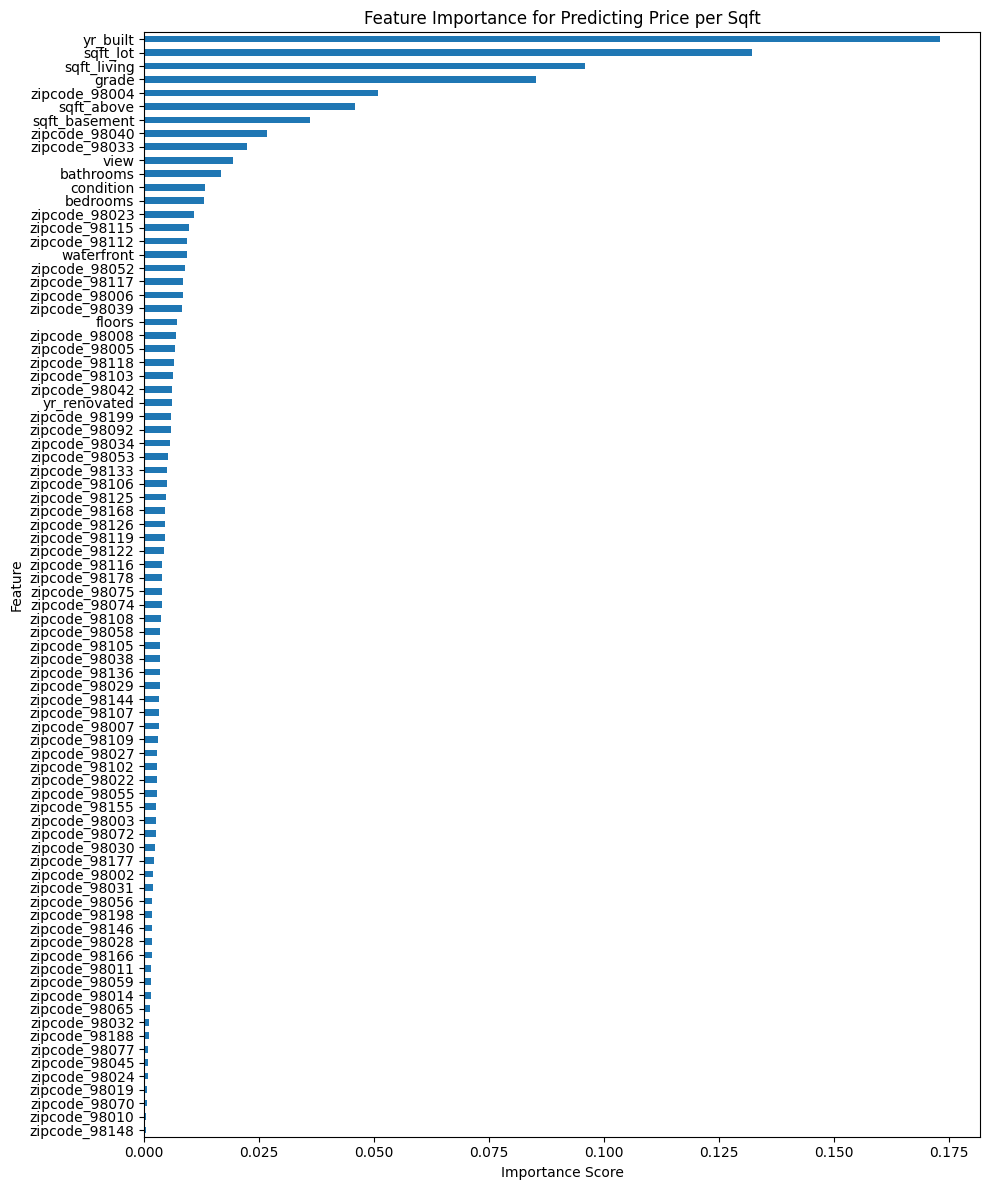

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Get importance values
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort from least important → most important
importances_sorted = importances.sort_values()

# Plot
plt.figure(figsize=(10, 12))
importances_sorted.plot(kind='barh')
plt.title("Feature Importance for Predicting Price per Sqft")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Creating charts and graphs to be used in the report and poster

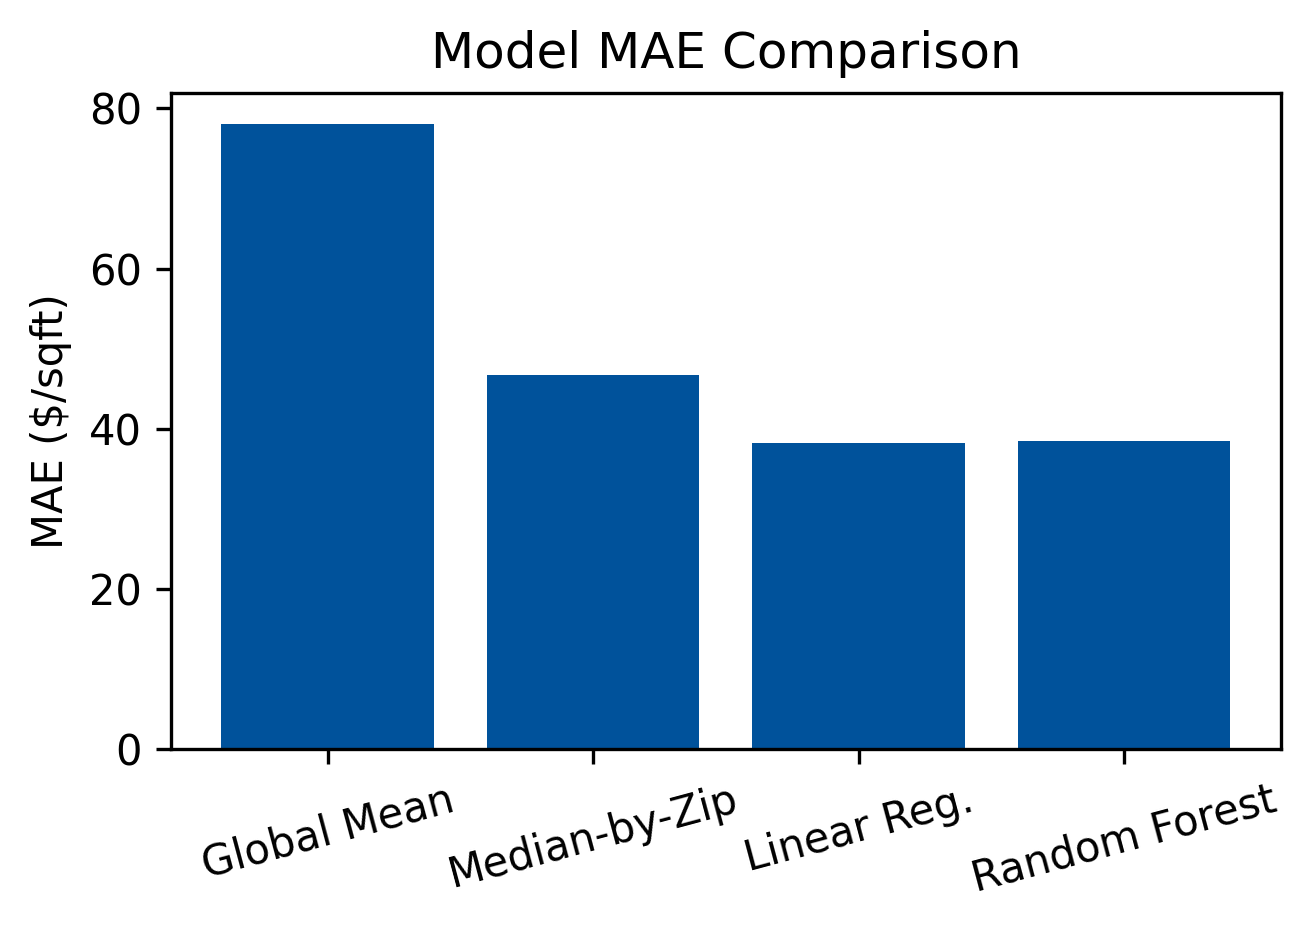

In [47]:
UF_BLUE = '#00529B' # Defining UF_BLUE as a hex color code

models = ["Global Mean", "Median-by-Zip", "Linear Reg.", "Random Forest"]
mae_values = [78.027506, 46.663417, 38.186271, 38.43]

plt.figure(figsize=(4.5, 3.2), dpi=300)
plt.bar(models, mae_values, color=UF_BLUE)
plt.ylabel("MAE ($/sqft)")
plt.title("Model MAE Comparison")
plt.xticks(rotation=15)
plt.tight_layout()


plt.savefig("model_mae_comparison_ufblue.png",
            dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

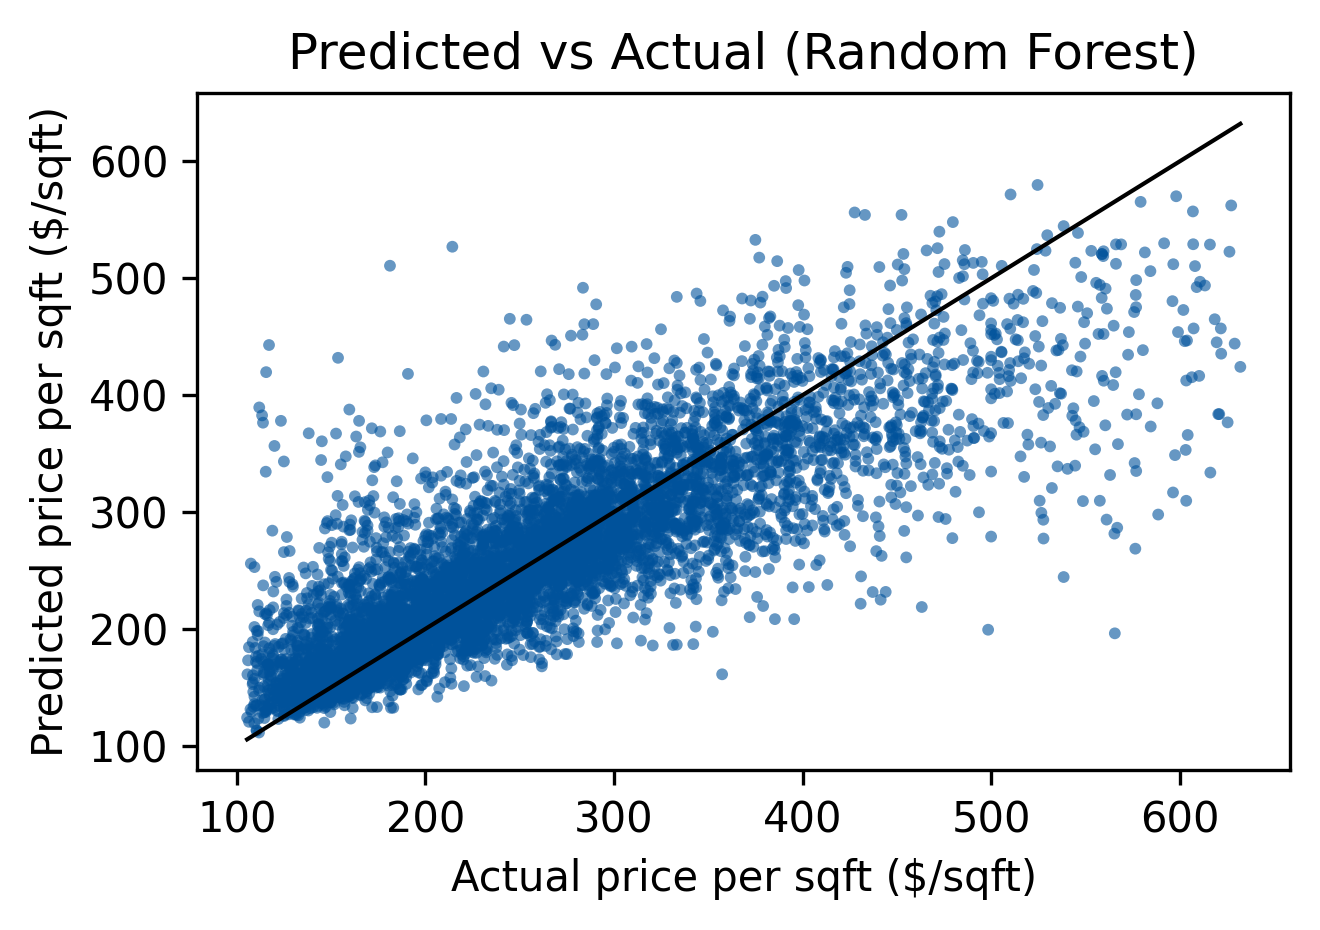

In [48]:

y_true = np.array(y_test).ravel()
y_pred = np.array(y_pred_rf).ravel()

min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())

plt.figure(figsize=(4.5, 3.2), dpi=300)
plt.scatter(y_true, y_pred,
            s=8, color=UF_BLUE, alpha=0.6, edgecolors="none")
plt.plot([min_val, max_val], [min_val, max_val],
         color="black", linewidth=1)

plt.xlabel("Actual price per sqft ($/sqft)")
plt.ylabel("Predicted price per sqft ($/sqft)")
plt.title("Predicted vs Actual (Random Forest)")
plt.tight_layout()

plt.savefig("pred_vs_actual_ufblue.png",
            dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

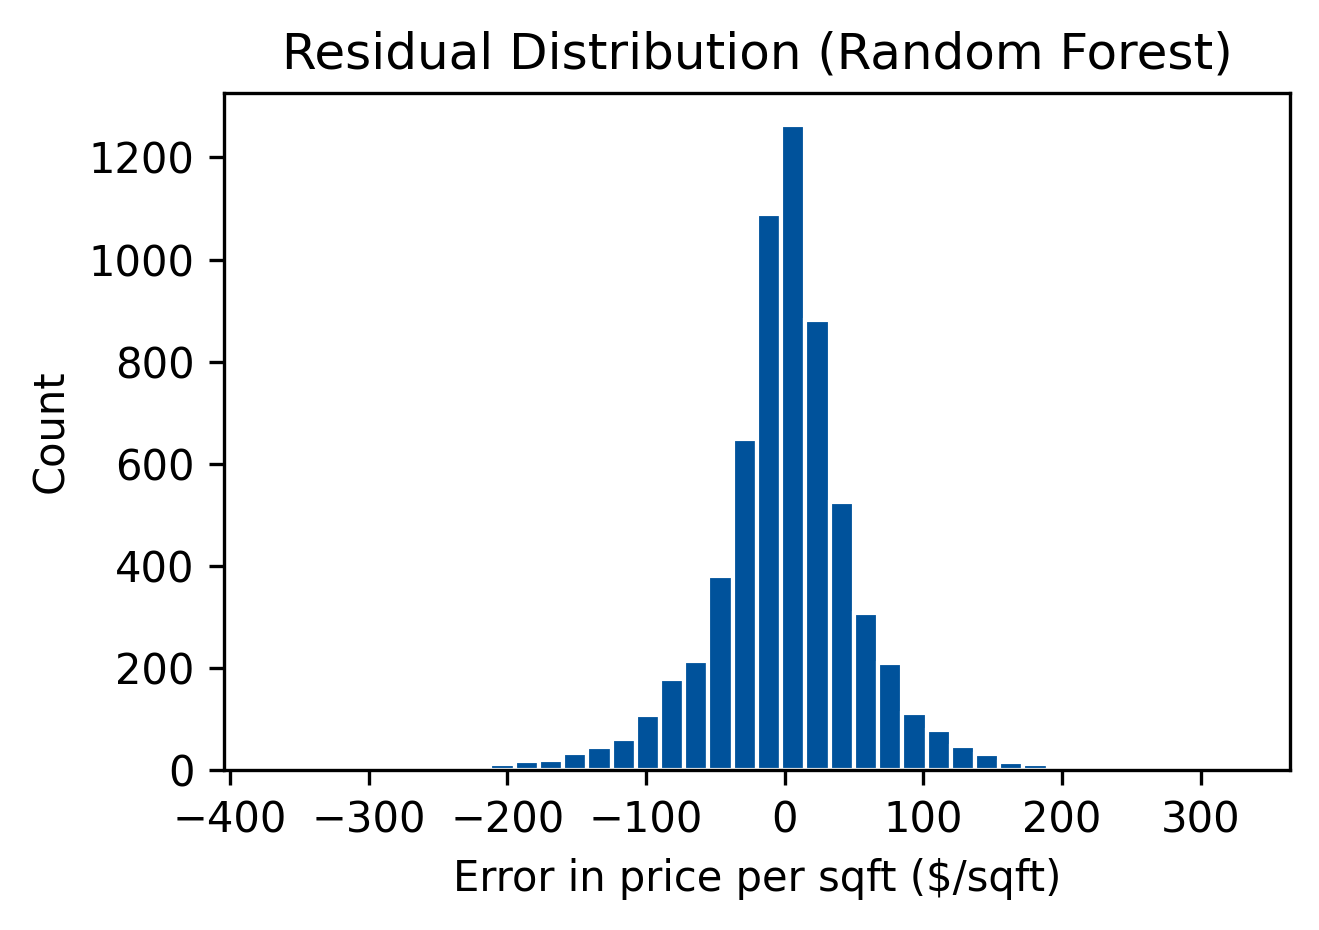

In [49]:
residuals = y_pred - y_true

plt.figure(figsize=(4.5, 3.2), dpi=300)
plt.hist(residuals, bins=40, color=UF_BLUE, edgecolor="white")
plt.xlabel("Error in price per sqft ($/sqft)")
plt.ylabel("Count")
plt.title("Residual Distribution (Random Forest)")
plt.tight_layout()

plt.savefig("residual_distribution_ufblue.png",
            dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

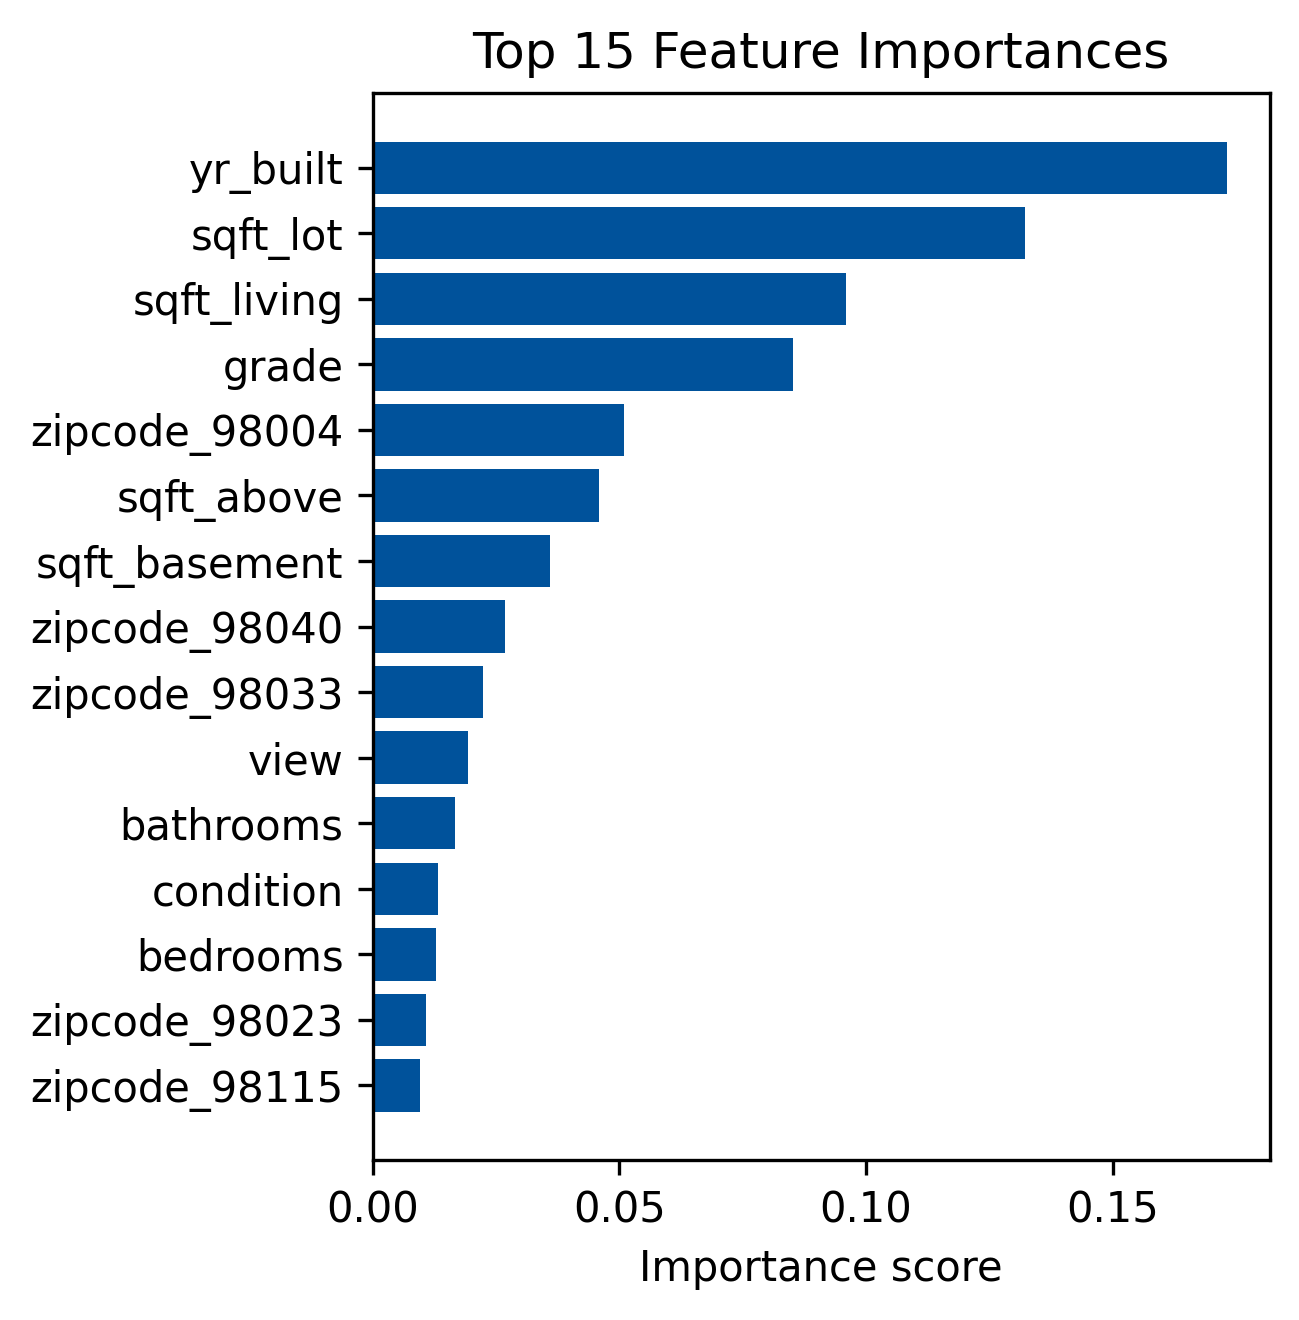

In [50]:
importances = rf.feature_importances_
feature_names = np.array(X_train.columns)

# Get indices of top 15 features
idx = np.argsort(importances)[-15:]
top_importances = importances[idx]
top_features = feature_names[idx]

# Sort within top 15
order = np.argsort(top_importances)
top_importances = top_importances[order]
top_features = top_features[order]

plt.figure(figsize=(4.5, 4.5), dpi=300)
plt.barh(top_features, top_importances, color=UF_BLUE)
plt.xlabel("Importance score")
plt.title("Top 15 Feature Importances")
plt.tight_layout()

plt.savefig("feature_importance_top15_ufblue.png",
            dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

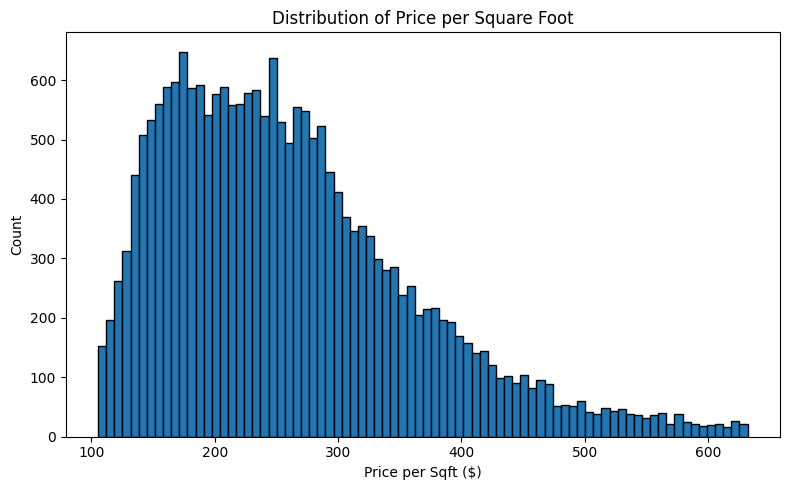

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df["price_per_sqft"], bins=80, edgecolor='black')
plt.title("Distribution of Price per Square Foot")
plt.xlabel("Price per Sqft ($)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

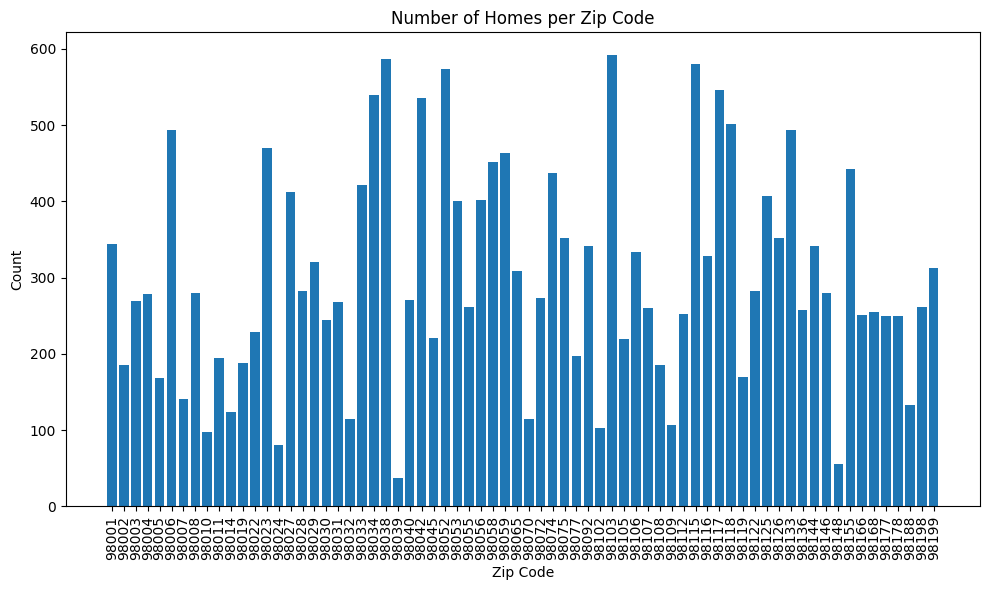

In [52]:
import matplotlib.pyplot as plt

zip_counts = df["zipcode"].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(zip_counts.index.astype(str), zip_counts.values)
plt.title("Number of Homes per Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()